# Centrality & Assortative Mixing

In [227]:

import networkx as nx
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
from conformity import attribute_conformity
%matplotlib inline

In [ ]:
def get_label_percentage(dictionary, label):
    sum = 0
    for key in dictionary:
        sum += dictionary[key]
    return float(dictionary[label]) / float(sum)

In [ ]:
def draw_net(G, measures, measure_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.1, linscale=10, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [ ]:
def pie_chart_function(dictionary, name_file = None, title = None):
    sector = list (dictionary.keys()) 
    data = list (dictionary.values())
# Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%".format(pct, absolute)
 
# Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = sector,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(f"{title}")
    plt.savefig(f"plots\\pie_{name_file}.pdf", format="pdf", bbox_inches="tight")
# show plot
    plt.show()

In [202]:
tot_pos = nx.read_gpickle('..\\data_collection\\graph\\pos_graph_tot.gpickle')
tot_neg = nx.read_gpickle('..\\data_collection\\graph\\neg_graph_tot.gpickle')
tot_pos.remove_edges_from(nx.selfloop_edges(tot_pos))
tot_neg.remove_edges_from(nx.selfloop_edges(tot_neg))

In [3]:
pos = nx.spring_layout(tot_pos)

## Centrality measures

### Closeness

In [163]:
closeness_pos = nx.closeness_centrality(tot_pos)
closeness_neg = nx.closeness_centrality(tot_neg)
closeness_pos = {k: v for k, v in sorted(closeness_pos.items(), key=lambda item: item[1],reverse=True)}
closeness_neg = {k: v for k, v in sorted(closeness_neg.items(), key=lambda item: item[1],reverse=True)}

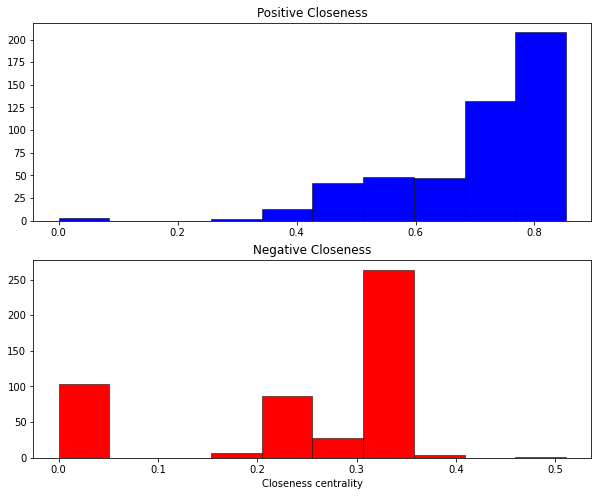

In [164]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax1.hist(closeness_pos.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Positive Closeness')
ax2.hist(closeness_neg.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Negative Closeness')
ax2.set_xlabel('Closeness centrality')
plt.savefig("plots\\distribution_closeness.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
draw_net(tot_pos, closeness_pos, 'Closeness Centrality')

In [ ]:
draw_net(tot_neg, closeness_neg, 'Closeness Centrality')

In [165]:
label_clos_pos = []
for x in range(0,20):
    label_clos_pos.append(tot_pos.nodes[list(closeness_pos.keys())[x]]["label"])
label_clos_pos_dict = {x:label_clos_pos.count(x) for x in label_clos_pos}

label_clos_neg = []
for x in range(0,20):
    label_clos_neg.append(tot_neg.nodes[list(closeness_neg.keys())[x]]["label"])
label_clos_neg_dict = {x:label_clos_neg.count(x) for x in label_clos_neg}

In [166]:
most_pos_clos = collections.defaultdict()
most_neg_clos = collections.defaultdict()
for sector in label_clos_pos_dict.keys():
    most_pos_clos[sector] = get_label_percentage(label_clos_pos_dict, sector)
for sector in label_clos_neg_dict.keys():
    most_neg_clos[sector] = get_label_percentage(label_clos_neg_dict, sector)
most_pos_clos = {k: v for k, v in sorted(most_pos_clos.items(), key=lambda item: item[1],reverse=True)}
most_neg_clos = {k: v for k, v in sorted(most_neg_clos.items(), key=lambda item: item[1],reverse=True)}

In [167]:
print('Most 20 closeness positive sector:\n')
for sector, value in most_pos_clos.items():
    print(f'{sector}: {value:.2f}')
print('\nMost 20 closeness negative:\n')
for sector, value in most_neg_clos.items():
    print(f'{sector}: {value:.2f}')

Most 20 closeness positive sector:

Industrial: 0.30
Financials: 0.30
Utilities: 0.15
Consumer Discretionary: 0.05
Health Care: 0.05
Materials: 0.05
Consumer Staples: 0.05
Communication_services: 0.05

Most 20 closeness negative:

Information Technology: 0.30
Real Estate: 0.15
Health Care: 0.15
Industrial: 0.15
Consumer Staples: 0.05
Communication_services: 0.05
Utilities: 0.05
Materials: 0.05
Consumer Discretionary: 0.05


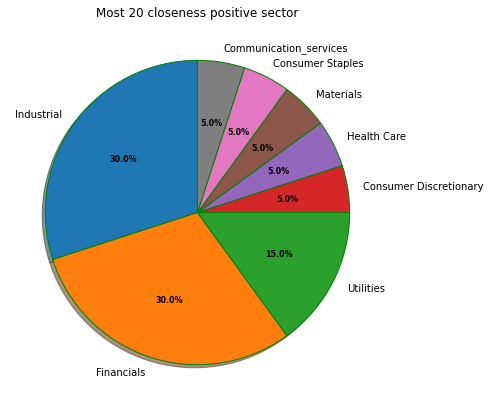

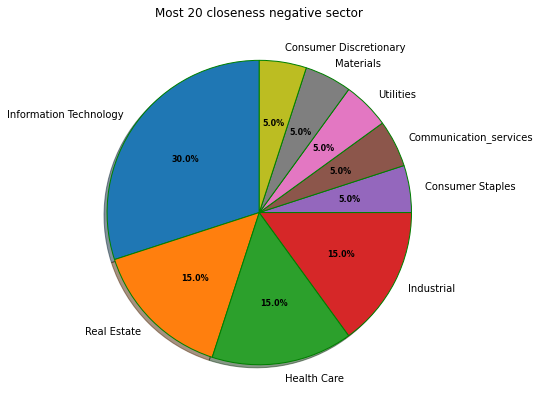

In [168]:
pie_chart_function(most_pos_clos, name_file = 'clos_pos', title = 'Most 20 closeness positive sector' )
pie_chart_function(most_neg_clos, name_file = 'clos_neg', title = 'Most 20 closeness negative sector' )


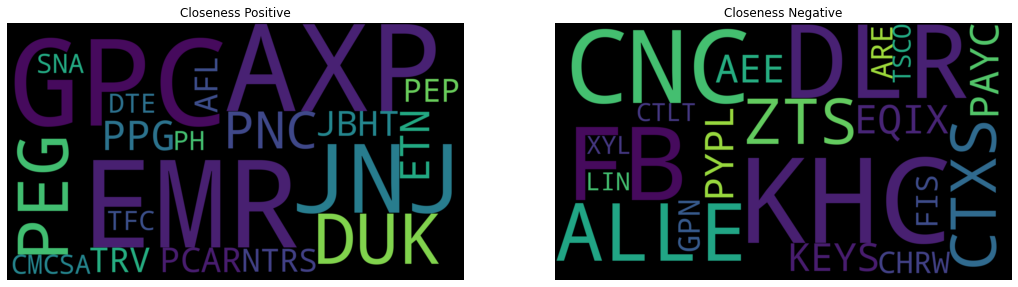

In [207]:
canvas_width=1920
canvas_height=1080
fig, ax = plt.subplots(1,2,figsize = (18,9))
wordcloud_neg = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(closeness_neg)
wordcloud_pos = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(closeness_pos)
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('Closeness Positive')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('Closeness Negative')
ax[0].axis('off')
ax[1].axis('off')
plt.savefig("plots\\wordcloud_closeness.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Betweenness Centrality

In [181]:
betweenness_pos = nx.betweenness_centrality(tot_pos)
betweenness_neg = nx.betweenness_centrality(tot_neg)
betweenness_pos = {k: v for k, v in sorted(betweenness_pos.items(), key=lambda item: item[1],reverse=True)}
betweenness_neg = {k: v for k, v in sorted(betweenness_neg.items(), key=lambda item: item[1],reverse=True)}

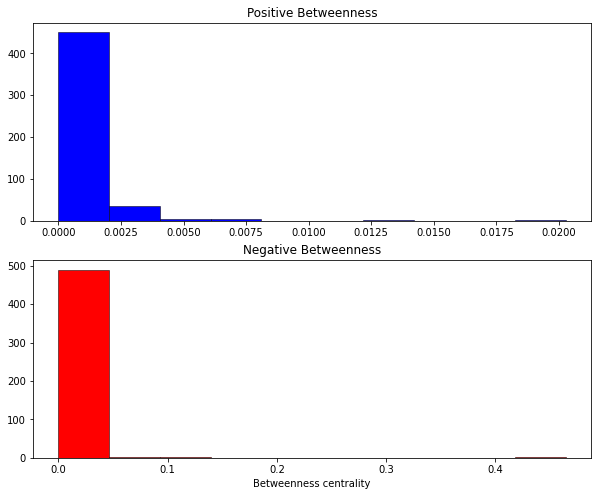

In [214]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax1.hist(betweenness_pos.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Positive Betweenness')
ax2.hist(betweenness_neg.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Negative Betweenness')
ax2.set_xlabel('Betweenness centrality')
plt.savefig("plots\\distribution_betweenness.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
draw_net(tot_pos, betweenness_pos, 'Betweenness Centrality')

In [ ]:
draw_net(tot_neg, betweenness_neg, 'Betweenness Centrality')

In [183]:
label_harm_pos = []
for x in range(0,20):
    label_harm_pos.append(tot_pos.nodes[list(betweenness_pos.keys())[x]]["label"])
label_harm_pos_dict = {x:label_harm_pos.count(x) for x in label_harm_pos}

label_harm_neg = []
for x in range(0,20):
    label_harm_neg.append(tot_neg.nodes[list(betweenness_neg.keys())[x]]["label"])
label_harm_neg_dict = {x:label_harm_neg.count(x) for x in label_harm_neg}

In [184]:
most_pos_bet = collections.defaultdict()
most_neg_bet = collections.defaultdict()
for sector in label_bet_pos_dict.keys():
    most_pos_bet[sector] = get_label_percentage(label_bet_pos_dict, sector)
for sector in label_bet_neg_dict.keys():
    most_neg_bet[sector] = get_label_percentage(label_bet_neg_dict, sector)
most_pos_bet = {k: v for k, v in sorted(most_pos_bet.items(), key=lambda item: item[1],reverse=True)}
most_neg_bet = {k: v for k, v in sorted(most_neg_bet.items(), key=lambda item: item[1],reverse=True)}

In [185]:
print('Most 20 betweenness positive sector:\n')
for sector, value in most_pos_bet.items():
    print(f'{sector}: {value:.2f}')
print('\nMost 20 betweenness negative:\n')
for sector, value in most_neg_bet.items():
    print(f'{sector}: {value:.2f}')

Most 20 betweenness positive sector:

Financials: 0.30
Industrial: 0.25
Materials: 0.20
Real Estate: 0.05
Communication_services: 0.05
Energy: 0.05
Consumer Staples: 0.05
Consumer Discretionary: 0.05

Most 20 betweenness negative:

Information Technology: 0.25
Energy: 0.15
Health Care: 0.15
Consumer Staples: 0.10
Financials: 0.10
Consumer Discretionary: 0.10
Industrial: 0.05
Real Estate: 0.05
Communication_services: 0.05


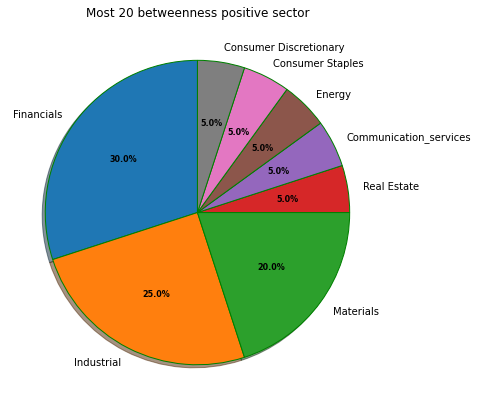

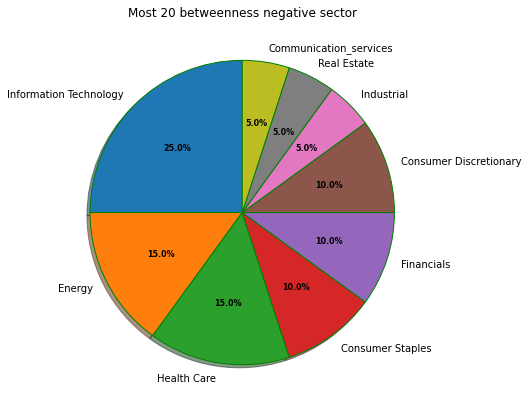

In [186]:
pie_chart_function(most_pos_bet, name_file = 'bet_pos', title = 'Most 20 betweenness positive sector' )
pie_chart_function(most_neg_bet, name_file = 'bet_neg', title = 'Most 20 betweenness negative sector' )

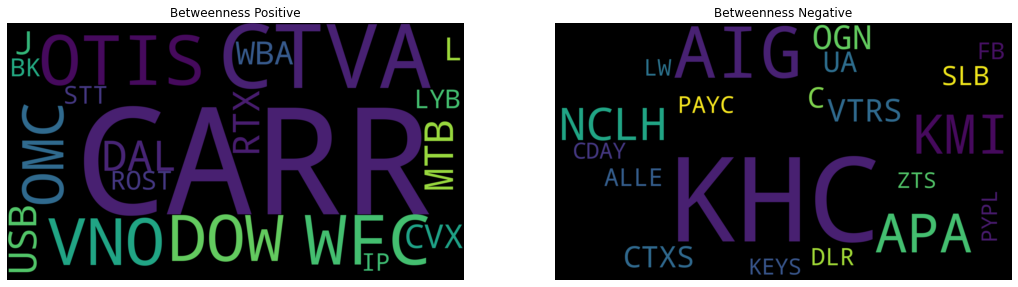

In [210]:
canvas_width=1920
canvas_height=1080
fig, ax = plt.subplots(1,2,figsize = (18,9))
wordcloud_neg = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(betweenness_neg)
wordcloud_pos = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(betweenness_pos)
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('Betweenness Positive')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('Betweenness Negative')
ax[0].axis('off')
ax[1].axis('off')
plt.savefig("plots\\wordcloud_betweenness.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Harmonic Centrality


In [187]:
harmonic_pos = nx.harmonic_centrality(tot_pos)
harmonic_neg = nx.harmonic_centrality(tot_neg)
harmonic_pos = {k: v for k, v in sorted(harmonic_pos.items(), key=lambda item: item[1],reverse=True)}
harmonic_neg = {k: v for k, v in sorted(harmonic_neg.items(), key=lambda item: item[1],reverse=True)}

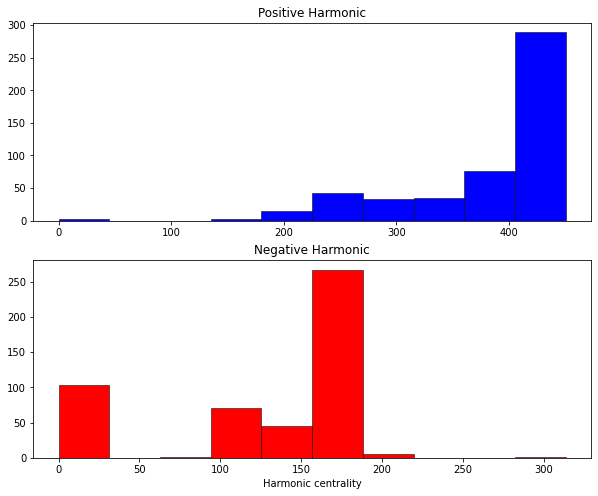

In [215]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax1.hist(harmonic_pos.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Positive Harmonic')
ax2.hist(harmonic_neg.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Negative Harmonic')
ax2.set_xlabel('Harmonic centrality')
plt.savefig("plots\\distribution_harmonic.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
draw_net(tot_pos, harmonic_pos, 'Betweenness Centrality')

In [ ]:
draw_net(tot_neg, harmonic_neg, 'Betweenness Centrality')

In [189]:
label_harm_pos = []
for x in range(0,20):
    label_harm_pos.append(tot_pos.nodes[list(harmonic_pos.keys())[x]]["label"])
label_harm_pos_dict = {x:label_harm_pos.count(x) for x in label_harm_pos}

label_harm_neg = []
for x in range(0,20):
    label_harm_neg.append(tot_neg.nodes[list(harmonic_neg.keys())[x]]["label"])
label_harm_neg_dict = {x:label_harm_neg.count(x) for x in label_harm_neg}

In [190]:
most_pos_harm = collections.defaultdict()
most_neg_harm = collections.defaultdict()
for sector in label_harm_pos_dict.keys():
    most_pos_harm[sector] = get_label_percentage(label_harm_pos_dict, sector)
for sector in label_harm_neg_dict.keys():
    most_neg_harm[sector] = get_label_percentage(label_harm_neg_dict, sector)
most_pos_harm = {k: v for k, v in sorted(most_pos_harm.items(), key=lambda item: item[1],reverse=True)}
most_neg_harm = {k: v for k, v in sorted(most_neg_harm.items(), key=lambda item: item[1],reverse=True)}


In [199]:
print('Most 20 harmonic positive sector:\n')
for sector, value in most_pos_harm.items():
    print(f'{sector}: {value:.2f}')
print('\nMost 20 harmonic negative:\n')
for sector, value in most_neg_harm.items():
    print(f'{sector}: {value:.2f}')

Most 20 harmonic positive sector:

Industrial: 0.25
Financials: 0.25
Utilities: 0.15
Health Care: 0.05
Consumer Discretionary: 0.05
Materials: 0.05
Consumer Staples: 0.05
Communication_services: 0.05
Real Estate: 0.05
Information Technology: 0.05

Most 20 harmonic negative:

Information Technology: 0.35
Health Care: 0.15
Consumer Staples: 0.10
Real Estate: 0.10
Consumer Discretionary: 0.10
Energy: 0.10
Communication_services: 0.05
Industrial: 0.05


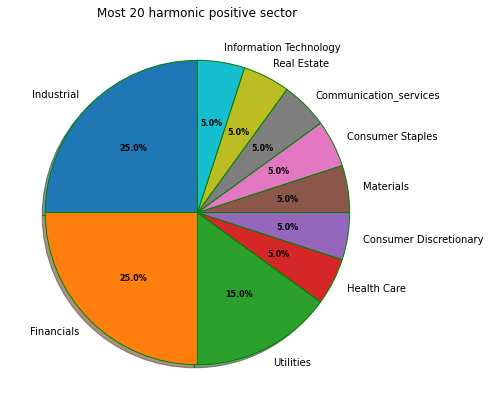

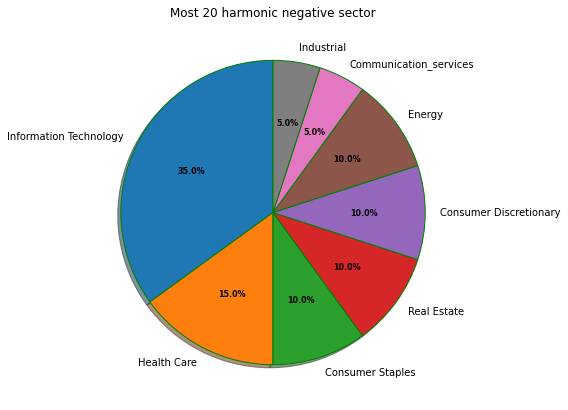

In [192]:
pie_chart_function(most_pos_harm, name_file = 'harm_pos', title = 'Most 20 harmonic positive sector' )
pie_chart_function(most_neg_harm, name_file = 'harm_neg', title = 'Most 20 harmonic negative sector' )

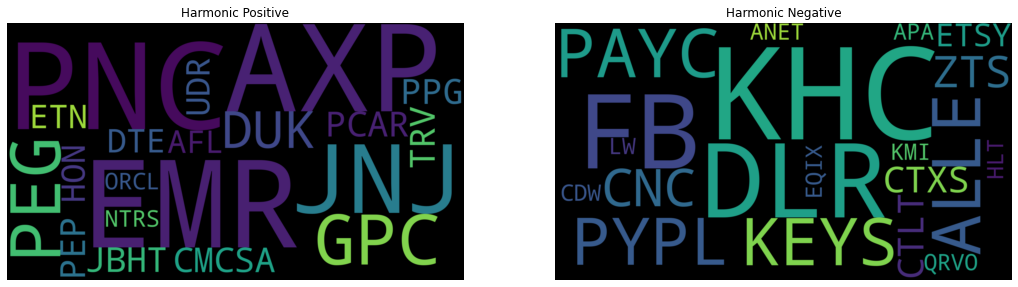

In [264]:
canvas_width=1920
canvas_height=1080
fig, ax = plt.subplots(1,2,figsize = (18,9))
wordcloud_neg = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(harmonic_neg)
wordcloud_pos = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(harmonic_pos)
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('Harmonic Positive')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('Harmonic Negative')
ax[0].axis('off')
ax[1].axis('off')
plt.savefig("plots\\wordcloud_harmonic.pdf", format="pdf", bbox_inches="tight")
plt.show()

### PageRank

In [256]:
pagerank_pos = nx.pagerank(tot_pos)
pagerank_neg = nx.pagerank(tot_neg)
pagerank_pos = {k: v for k, v in sorted(pagerank_pos.items(), key=lambda item: item[1],reverse=True)}
pagerank_neg = {k: v for k, v in sorted(pagerank_neg.items(), key=lambda item: item[1],reverse=True)}


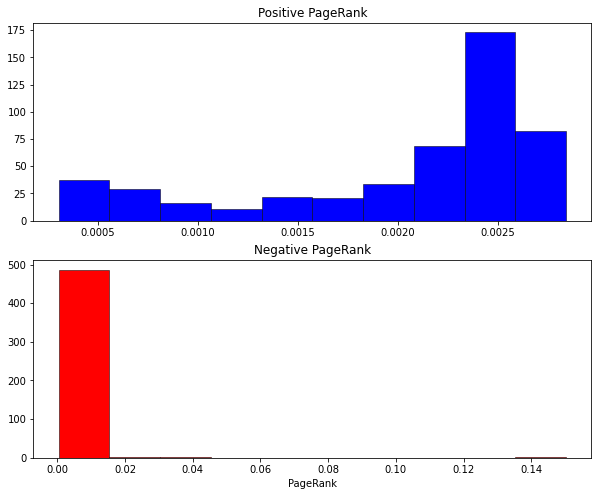

In [266]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax1.hist(pagerank_pos.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Positive PageRank')
ax2.hist(pagerank_neg.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Negative PageRank')
ax2.set_xlabel('PageRank')
plt.savefig("plots\\distribution_pagerank.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [258]:
label_page_pos = []
for x in range(0,20):
    label_page_pos.append(tot_pos.nodes[list(pagerank_pos.keys())[x]]["label"])
label_page_pos_dict = {x:label_page_pos.count(x) for x in label_page_pos}

label_page_neg = []
for x in range(0,20):
    label_page_neg.append(tot_neg.nodes[list(pagerank_neg.keys())[x]]["label"])
label_page_neg_dict = {x:label_page_neg.count(x) for x in label_page_neg}

In [259]:
most_pos_page = collections.defaultdict()
most_neg_page = collections.defaultdict()
for sector in label_page_pos_dict.keys():
    most_pos_page[sector] = get_label_percentage(label_page_pos_dict, sector)
for sector in label_page_neg_dict.keys():
    most_neg_page[sector] = get_label_percentage(label_page_neg_dict, sector)
most_pos_page = {k: v for k, v in sorted(most_pos_page.items(), key=lambda item: item[1],reverse=True)}
most_neg_page = {k: v for k, v in sorted(most_neg_page.items(), key=lambda item: item[1],reverse=True)}

In [260]:
print('Most 20 harmonic positive sector:\n')
for sector, value in most_pos_page.items():
    print(f'{sector}: {value:.2f}')
print('\nMost 20 harmonic negative:\n')
for sector, value in most_neg_page.items():
    print(f'{sector}: {value:.2f}')

Most 20 harmonic positive sector:

Financials: 0.30
Industrial: 0.25
Utilities: 0.15
Health Care: 0.05
Consumer Discretionary: 0.05
Consumer Staples: 0.05
Real Estate: 0.05
Communication_services: 0.05
Materials: 0.05

Most 20 harmonic negative:

Energy: 0.25
Health Care: 0.15
Industrial: 0.15
Information Technology: 0.15
Financials: 0.10
Consumer Discretionary: 0.10
Consumer Staples: 0.05
Communication_services: 0.05


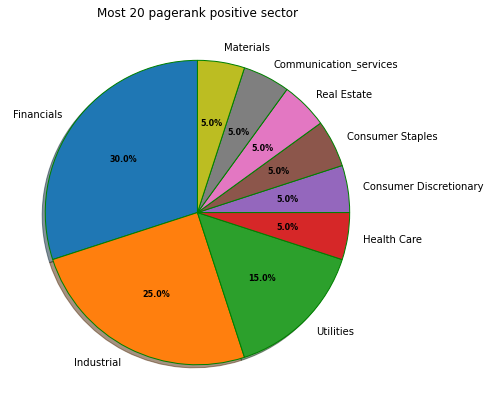

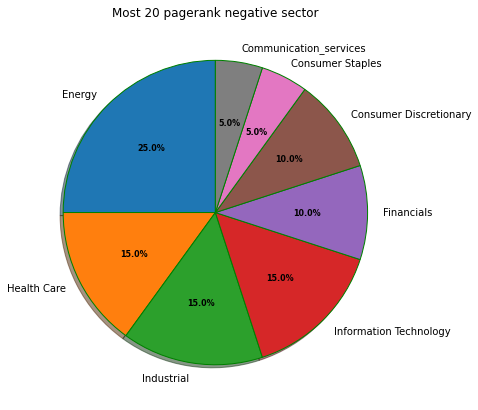

In [261]:
pie_chart_function(most_pos_page, name_file = 'page_pos', title = 'Most 20 pagerank positive sector' )
pie_chart_function(most_neg_page, name_file = 'page_neg', title = 'Most 20 pagerank negative sector' )

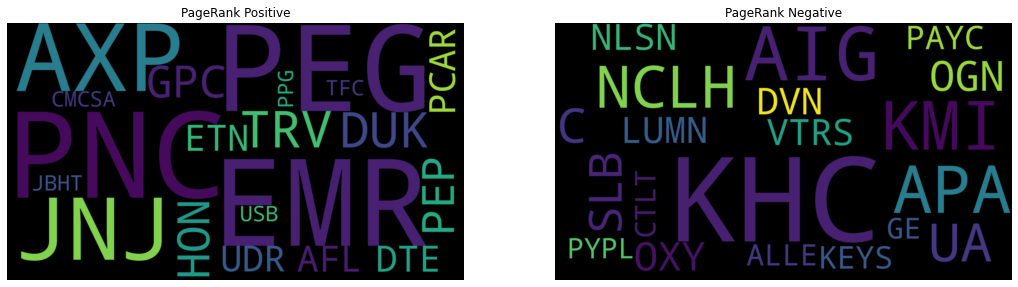

In [267]:
canvas_width=1920
canvas_height=1080
fig, ax = plt.subplots(1,2,figsize = (18,9))
wordcloud_neg = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(pagerank_neg)
wordcloud_pos = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(pagerank_pos)
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('PageRank Positive')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('PageRank Negative')
ax[0].axis('off')
ax[1].axis('off')
plt.savefig("plots\\wordcloud_pagerank.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Eigenvector

In [195]:
eigen_pos = nx.eigenvector_centrality(tot_pos)

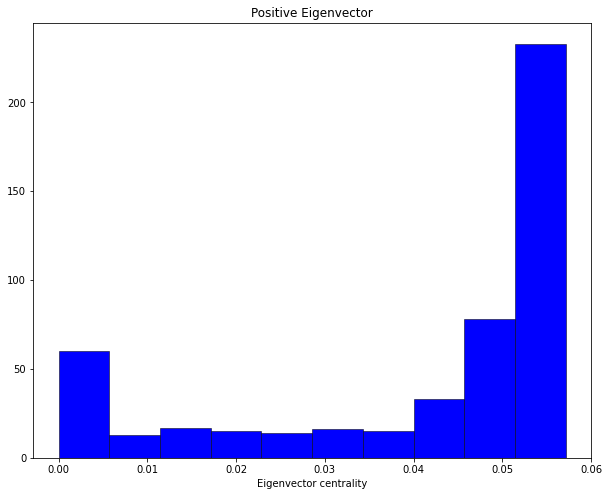

In [216]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax1.hist(eigen_pos.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Positive Eigenvector')
ax1.set_xlabel('Eigenvector centrality')
plt.savefig("plots\\distribution_eigen.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
draw_net(tot_pos, eigen_pos, 'Eigenvector  Centrality')

In [197]:
label_eig_pos = []
for x in range(0,20):
    label_eig_pos.append(tot_pos.nodes[list(eigen_pos.keys())[x]]["label"])
label_eig_pos_dict = {x:label_eig_pos.count(x) for x in label_eig_pos}

In [198]:
most_pos_eig = collections.defaultdict()
for sector in label_eig_pos_dict.keys():
    most_pos_eig[sector] = get_label_percentage(label_eig_pos_dict, sector)
most_pos_eig = {k: v for k, v in sorted(most_pos_eig.items(), key=lambda item: item[1],reverse=True)}

In [200]:
print('Most 20 eigenvector positive sector:\n')
for sector, value in most_pos_eig.items():
    print(f'{sector}: {value:.2f}')

Most 20 eigenvector positive sector:

Information Technology: 0.30
Health Care: 0.25
Utilities: 0.15
Financials: 0.15
Industrial: 0.05
Consumer Discretionary: 0.05
Consumer Staples: 0.05


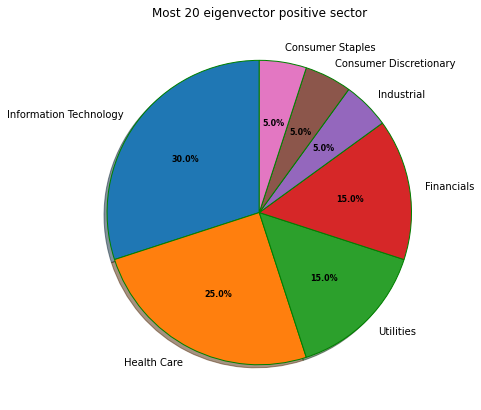

In [201]:
pie_chart_function(most_pos_eig, name_file = 'eig_pos', title = 'Most 20 eigenvector positive sector' )

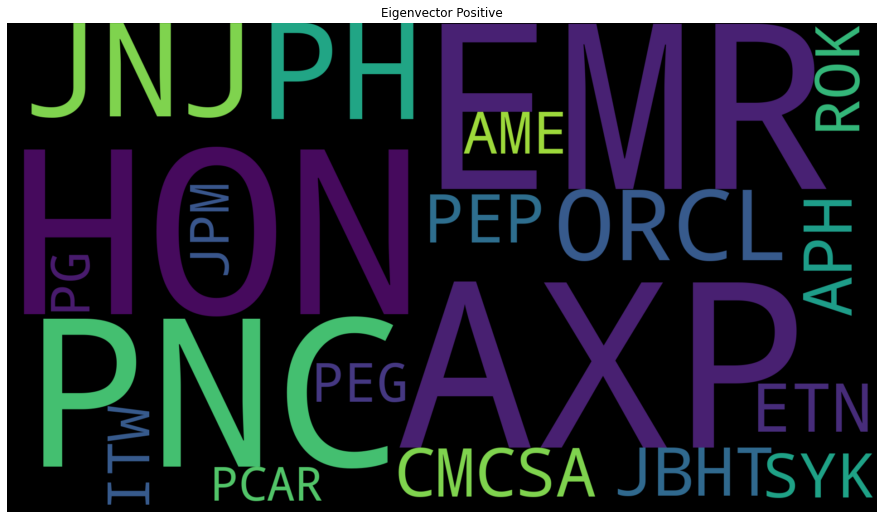

In [217]:
canvas_width=1920
canvas_height=1080
fig, ax = plt.subplots(1,1,figsize = (18,9))
wordcloud_pos = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(eigen_pos)
ax.imshow(wordcloud_pos, interpolation='bilinear')
ax.set_title('Eigenvector Positive')
ax.axis('off')
plt.savefig("plots\\wordcloud_eigenvector.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Assortative Mixing


In [148]:
print(f'Positive assortativity:{nx.degree_assortativity_coefficient(tot_pos):.2f} \t Negative assortativity:{nx.degree_assortativity_coefficient(tot_neg):.2f}')

Positive assortativity:0.14 	 Negative assortativity:-0.34


### KNNK

In [213]:
knnk_pos = nx.k_nearest_neighbors(tot_pos)
knnk_pos = dict(sorted(knnk_pos.items()))
knnk_neg = nx.k_nearest_neighbors(tot_neg)
knnk_neg = dict(sorted(knnk_neg.items()))

C:\Users\manue\AppData\Local\Temp\ipykernel_21228\2353997804.py:1: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knnk_pos = nx.k_nearest_neighbors(tot_pos)
C:\Users\manue\AppData\Local\Temp\ipykernel_21228\2353997804.py:3: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knnk_neg = nx.k_nearest_neighbors(tot_neg)


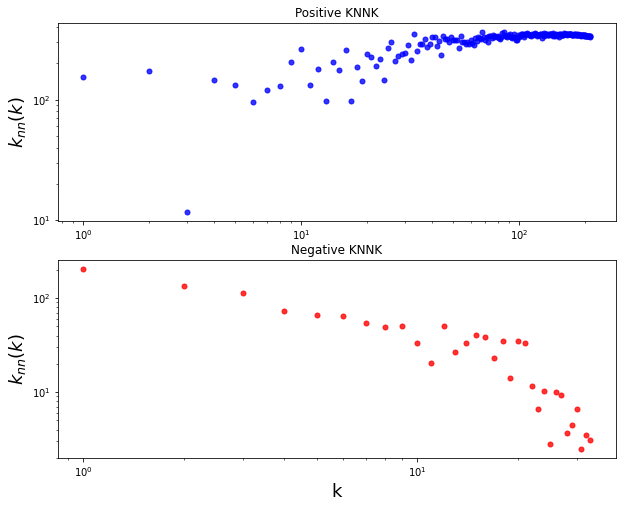

In [218]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax1.plot(knnk_pos.values(), 'b.', ms=10, alpha=0.8)
ax1.set_title('Positive KNNK')
ax1.loglog()
ax1.set_ylabel(r"$k_{nn}(k)$",fontsize=18)
ax2.plot(knnk_neg.values(),'r.', ms=10, alpha=0.8)
ax2.set_title('Negative KNNK')
ax2.set_xlabel('k', fontsize=18)
ax2.loglog()
ax2.set_ylabel(r"$k_{nn}(k)$",fontsize=18)
plt.savefig("plots\\distribution_knnk.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [222]:
print(f'Positive assortative for label:{nx.attribute_assortativity_coefficient(tot_pos, "label"):.2f} \t Negative assortative for label:{nx.attribute_assortativity_coefficient(tot_neg, "label"):.2f}' )

Positive assortative for label:0.01 	 Negative assortative for label:-0.08


### Conformity

In [223]:
h_pos = tot_pos.copy()
h_neg = tot_neg.copy()

In [224]:
gcc_pos = sorted(nx.connected_components(h_pos), key=len, reverse=True)
gcc_neg = sorted(nx.connected_components(h_neg), key=len, reverse=True)
h0_pos = h_pos.subgraph(gcc_pos[0])
h0_neg = h_neg.subgraph(gcc_neg[0])


In [229]:
alphas = [1.0, 2.0, 3.0, 4.0, 5.0] # decay factors
res_pos = attribute_conformity(h0_pos, alphas, ['label'], profile_size=1)
res_neg = attribute_conformity(h0_neg, alphas, ['label'], profile_size=1)

100%|██████████| 391/391 [00:03<00:00, 107.39it/s]


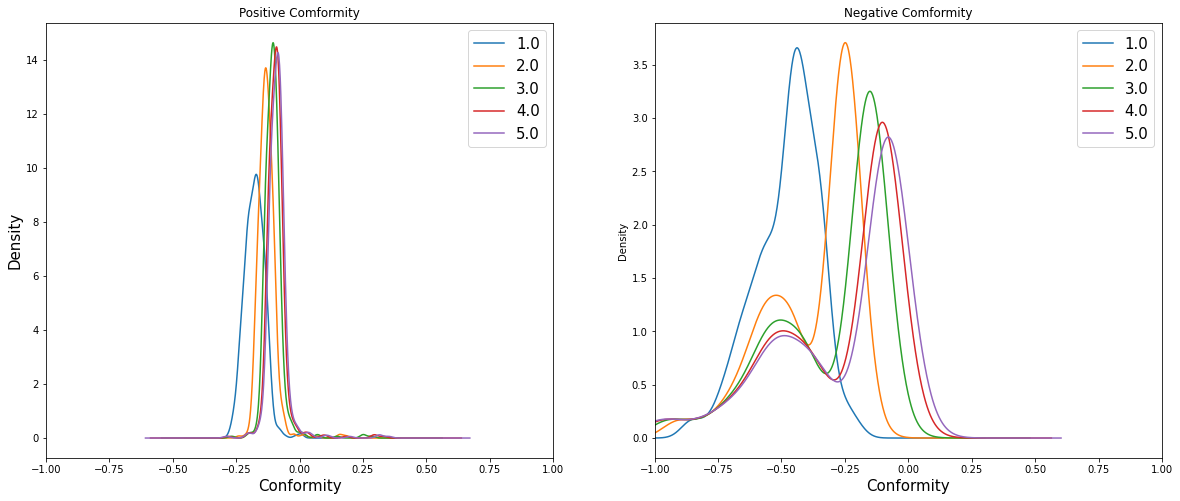

In [230]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
for alpha, profiles in res_pos.items():
    for profile, data in profiles.items():
        df_pos = pd.DataFrame(list(data.values()), columns=[alpha])
        df_pos.plot.kde(ax=ax1)
for alpha, profiles in res_neg.items():
    for profile, data in profiles.items():
        df_neg = pd.DataFrame(list(data.values()), columns=[alpha])
        df_neg.plot.kde(ax=ax2)
ax1.set_ylabel('Density', fontsize = 15) 
ax1.set_xlabel('Conformity', fontsize = 15) 
ax1.set_xlim((-1,1))
ax1.legend(fontsize=15)
ax1.set_title('Positive Comformity')
ax2.set_title('Negative Comformity')
ax2.set_xlabel('Conformity', fontsize = 15) 
ax2.set_xlim((-1,1))
ax2.legend(fontsize=15)
plt.savefig("plots\\comformity.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [245]:
conf_a3_pos = res_pos['3.0']['label']
conf_a3_neg = res_neg['3.0']['label']
conf_a3_pos = {k: v for k, v in sorted(conf_a3_pos.items(), key=lambda item: item[1],reverse=True)}
conf_a3_neg = {k: v for k, v in sorted(conf_a3_neg.items(), key=lambda item: item[1],reverse=True)}

In [233]:
node_assortativity_pos = [(k, v) for k, v in sorted(conf_a3_pos.items(), key=lambda item: item[1])]
node_assortativity_neg = [(k, v) for k, v in sorted(conf_a3_neg.items(), key=lambda item: item[1])]

In [234]:
print('Most disassortative firms (positive)')
for nd in node_assortativity_pos[0:10]:
    print(f"{nd[0]: >20}\t{nd[1]: >10.2f}\t{h_pos.nodes[nd[0]]['label']: >20}")
print('Most disassortative firms (negative)')
for nd in node_assortativity_neg[0:10]:
    print(f"{nd[0]: >20}\t{nd[1]: >10.2f}\t{h_neg.nodes[nd[0]]['label']: >20}")

Most disassortative firms (positive)
                 KHC	     -0.27	    Consumer Staples
                VTRS	     -0.20	         Health Care
                TWTR	     -0.20	Communication_services
                LUMN	     -0.19	Communication_services
                 NEM	     -0.17	           Materials
                NWSA	     -0.16	Communication_services
                 IVZ	     -0.16	          Financials
                 NWS	     -0.16	Communication_services
                FOXA	     -0.16	Communication_services
                 FCX	     -0.16	           Materials
Most disassortative firms (negative)
                 CPB	     -0.98	    Consumer Staples
                 IFF	     -0.97	           Materials
                 VMC	     -0.97	           Materials
                 CAG	     -0.96	    Consumer Staples
                 STZ	     -0.96	    Consumer Staples
                 TSN	     -0.96	    Consumer Staples
                 HAS	     -0.95	Consumer Discretionary
             

In [221]:
print('Less disassortative firms (positive)')
for nd in list(reversed(node_assortativity_pos[-11:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10.2f}\t{h_pos.nodes[nd[0]]['label']: >20}")
print('Less disassortative firms (negative)')
for nd in list(reversed(node_assortativity_neg[-11:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10.2f}\t{h_neg.nodes[nd[0]]['label']: >20}")

Less disassortative firms (positive)
                 DVN	      0.25	              Energy
                 BKR	      0.25	              Energy
                 MRO	      0.15	              Energy
                 SLB	      0.07	              Energy
                 MOS	      0.07	           Materials
                  UA	      0.02	Consumer Discretionary
                  GE	      0.01	          Industrial
                 OXY	      0.00	              Energy
                 HAL	     -0.00	              Energy
                NLSN	     -0.02	          Industrial
Less disassortative firms (negative)
                 TGT	     -0.07	Consumer Discretionary
                POOL	     -0.07	Consumer Discretionary
                CPRT	     -0.07	          Industrial
                 PEP	     -0.08	    Consumer Staples
                  KO	     -0.08	    Consumer Staples
                 KMB	     -0.08	    Consumer Staples
                 CHD	     -0.08	    Consumer Staples
                  R

In [246]:
label_comf_pos = []
for x in range(0,20):
    label_comf_pos.append(tot_pos.nodes[list(conf_a3_pos.keys())[x]]["label"])
label_comf_pos_dict = {x:label_comf_pos.count(x) for x in label_comf_pos}

label_comf_neg = []
for x in range(0,20):
    label_comf_neg.append(tot_neg.nodes[list(conf_a3_neg.keys())[x]]["label"])
label_comf_neg_dict = {x:label_comf_neg.count(x) for x in label_comf_neg}

In [247]:
most_pos_comf = collections.defaultdict()
most_neg_comf = collections.defaultdict()
for sector in label_comf_pos_dict.keys():
    most_pos_comf[sector] = get_label_percentage(label_comf_pos_dict, sector)
for sector in label_comf_neg_dict.keys():
    most_neg_comf[sector] = get_label_percentage(label_comf_neg_dict, sector)
most_pos_comf = {k: v for k, v in sorted(most_pos_comf.items(), key=lambda item: item[1],reverse=True)}
most_neg_comf = {k: v for k, v in sorted(most_neg_comf.items(), key=lambda item: item[1],reverse=True)}


In [248]:
print('Most 20 comformity positive sector:\n')
for sector, value in most_pos_comf.items():
    print(f'{sector}: {value:.2f}')
print('\nMost 20 comformity negative:\n')
for sector, value in most_neg_comf.items():
    print(f'{sector}: {value:.2f}')

Most 20 comformity positive sector:

Energy: 0.35
Information Technology: 0.20
Industrial: 0.15
Financials: 0.15
Consumer Discretionary: 0.10
Materials: 0.05

Most 20 comformity negative:

Financials: 0.30
Consumer Discretionary: 0.20
Consumer Staples: 0.20
Energy: 0.10
Health Care: 0.10
Information Technology: 0.05
Industrial: 0.05


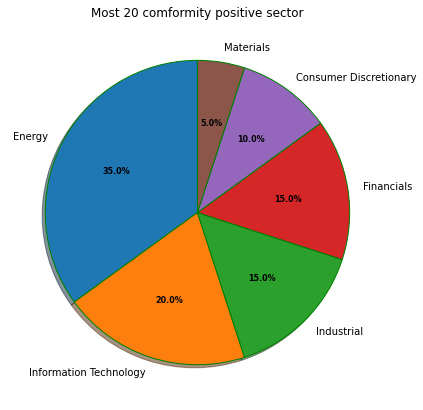

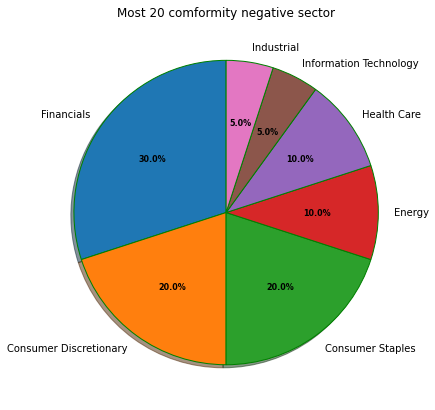

In [249]:
pie_chart_function(most_pos_comf, name_file = 'comf_pos', title = 'Most 20 comformity positive sector' )
pie_chart_function(most_neg_comf, name_file = 'comf_neg', title = 'Most 20 comformity negative sector' )

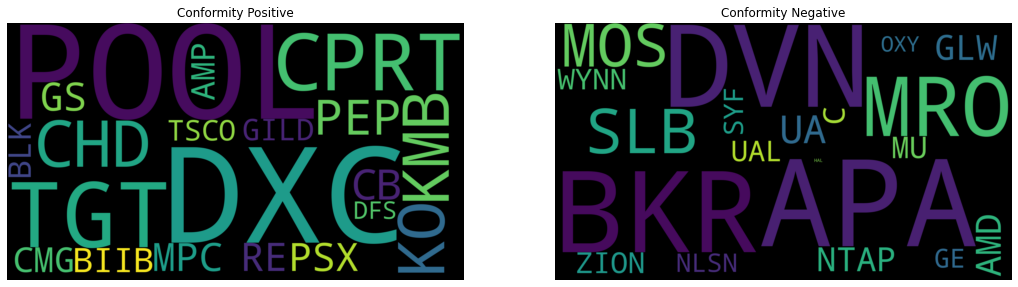

In [237]:
canvas_width=1920
canvas_height=1080
fig, ax = plt.subplots(1,2,figsize = (18,9))
wordcloud_neg = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(conf_a3_pos)
wordcloud_pos = WordCloud(width=canvas_width,height=canvas_height,
                      max_words=20, normalize_plurals=False, random_state = 42).generate_from_frequencies(conf_a3_neg)
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('Conformity Positive')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('Conformity Negative')
ax[0].axis('off')
ax[1].axis('off')
plt.savefig("plots\\wordcloud_conformity.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [224]:
na_pos = {c[0]: c[1] for c in node_assortativity_pos}
na_neg = {c[0]: c[1] for c in node_assortativity_neg}

In [ ]:
draw_net(h_pos, na_pos, "Multiscale Mixing")

In [ ]:
draw_net(h_neg, na_neg, "Multiscale Mixing")